# KKN (k-nearest neighbour)

In [35]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import queue

### 1.  [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
+ kein training nötig

+ ansatz mit so hoh dimensionalen daten relativ unrealistisch

+   generic formula:\
()
$\hat Y(x)=k_{max}\big|\forall k_j,k_{max}\in K, k_j \neq k_{max},\#\big\lgroup x_i\in N_\lambda(x) \land x_i \in k_{max}\big\rgroup \geq \#\big\lgroup x_i\in N_\lambda(x)\land x_i \in k_j\big\rgroup$
    +   $N_\lambda(x)$ is the neighbourhood around $x$ (the $\lambda$ closest sample) points to $x$
    + $K$ are the possible classes
+ problem specific formula:\
\
$\hat Y(x) = \Bigg\lfloor \frac{1}{\lambda}\bigg( \underset{x_i\in N_\lambda(x)}\sum y_i\bigg) + 0.5 \Bigg\rfloor$

   +   $y_i =\begin{cases} 0 & \text{if } y_{x} \ge Y(x) \\ 1 & \text{otherwise}\\\end{cases}$


#### constants

In [36]:
# size of reference dataset 
n = 200
# size of the neighborhood
k = 1
# dim x [0,10]
dim_x_min = 0
dim_x_max = 10
# dim y [0,4]
dim_y_min = 0
dim_y_max = 4

Target function

In [37]:
Y = lambda x : math.sin(x) + 0.3*x

Calc the border of the function

In [38]:
x = np.linspace(0,dim_x_max,100)
y = [Y(ele) for ele in x]

generate n random point on the plane an give them label 

        blue   == 0
        orange == 1

In [39]:
# list with tuple (x, y) and label ('b' or 'o')
Yi = np.empty((n,3))
for i in range(n):
    Yi[i,0] = dim_x_min + (random.random() * dim_x_max)
    Yi[i,1] = dim_y_min + (random.random() * dim_y_max)
    if Yi[i,1] >= Y(Yi[i,0]):
        Yi[i][2] = 0
    else:
        Yi[i][2] = 1

transfrom label to color for plotting

In [40]:
# transfrom label to color 
cols = []
for c in Yi[:,2]:
    if c == 0:
        cols.append('blue')
    else:
        cols.append('orange')

#### brute force $N_{k}$

In [41]:
def distance(x1,y1,x2,y2):
    return math.sqrt(((x2-x1)**2)+((y2-y1)**2))

def knn(list, x ,y, k = 10):
    pq = queue.PriorityQueue()
    for p in Yi:
        pq.put((distance(x,y,p[0],p[1]), p[2]))
    sum_c = 0
    counter = 0
    while not pq.empty() and counter < k:
        _, c = pq.get()
        sum_c += c
        counter += 1
    return round(sum_c/k)

calc for the whole grip the prediction $\hat{Y}$

In [42]:
xx = np.linspace(dim_x_min, dim_x_max, 200)
yy = np.linspace(dim_y_min, dim_y_max, 200)
list = []
for yi in yy:
    col = []
    for xi in xx:
        col.append(knn(Yi, xi, yi))
    list.append(col)
zz = np.array(list)

plot
*   $Y$
*   $x_{i}$
*   $\hat{Y}$

<function matplotlib.pyplot.show(close=None, block=None)>

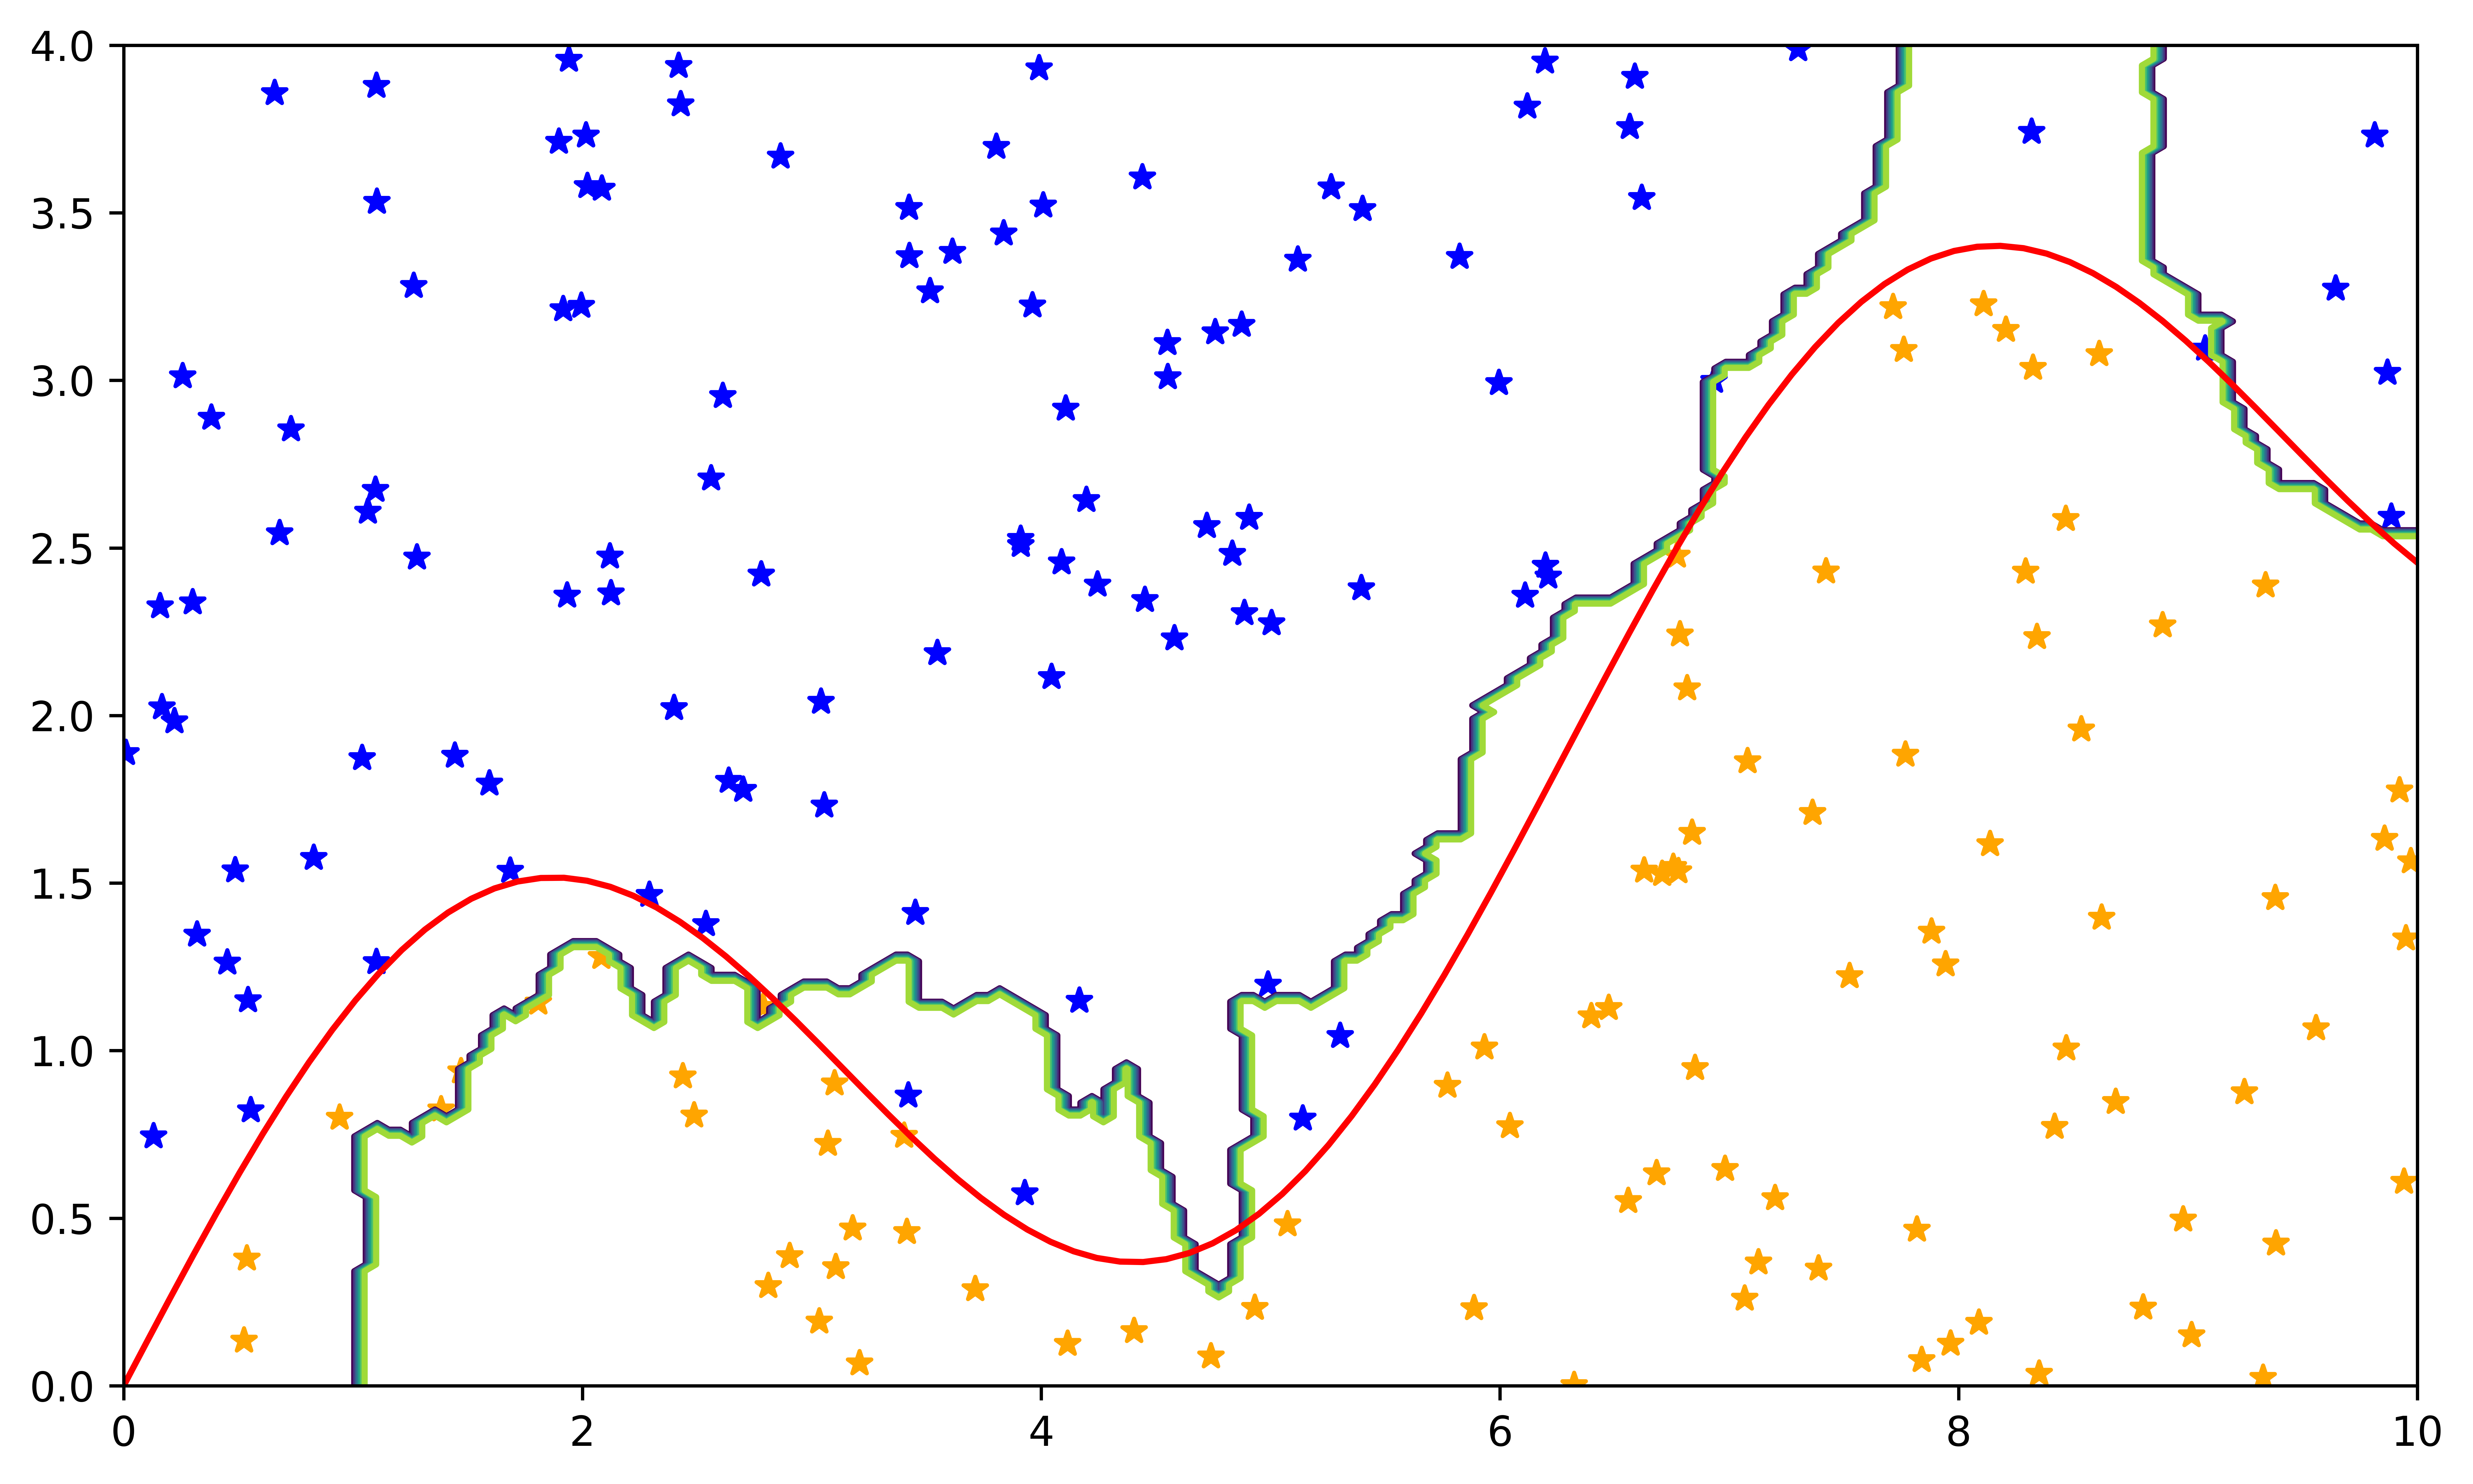

In [43]:

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = (1000)
h = plt.contour(xx, yy, zz)
x = np.linspace(0,dim_x_max,100)
y = [Y(ele) for ele in x]
sc = plt.scatter(Yi[:,0], Yi[:,1], c=cols, alpha=1, marker='*')
br = plt.plot(x,y, color='red')
plt.show

### References
*   Hastie, Trevor ; Tibshirani, Robert ; Friedman, Jerome: The Elements of Statistical Learning : Data Mining, Inference, and Prediction. Berlin-Heidelberg: Springer New York, 2017.